<a href="https://colab.research.google.com/github/Kartik77/MNIST-CNN/blob/master/Batchnorm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.optim as optim
import seaborn as sns

#Dataset 

In [0]:
trainset = torchvision.datasets.MNIST(root='./data', train = True, download= True, transform= transforms.ToTensor())

In [0]:
batch_size = 4

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [71]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[0].shape)
print(labels[0].item())

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
1


In [0]:
def imshow(img, title):

  plt.figure(figsize=(batch_size*4, 4))
  plt.axis('off')
  plt.imshow(np.transpose(img, (1,2,0)))
  plt.title(title)
  plt.show()

In [0]:
def show_batch_images(dataloader):
  images,labels = next(iter(dataloader))

  img = torchvision.utils.make_grid(images)
  imshow(img, title=[str(x.item()) for x in labels])

  return images,labels

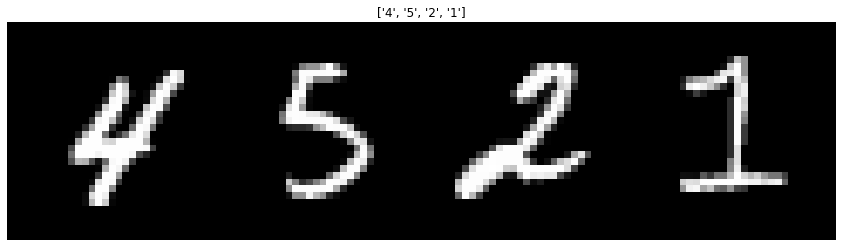

In [74]:
images, labels = show_batch_images(trainloader)

#Batchnorm

In [0]:
class MyNet(nn.Module):
  def __init__(self):
    super(MyNet, self).__init__()
    self.classifier = nn.Sequential(
        nn.Linear(784, 48),
        nn.ReLU(),
        nn.Linear(48,24),
        nn.ReLU(),
        nn.Linear(24,10)
    )

  def forward(self,x):
    x =x.view(x.size(0), -1)
    x= self.classifier(x)
    return x

In [0]:
class MyNetBN(nn.Module):
  def __init__(self):
    super(MyNetBN, self).__init__()
    self.classifier = nn.Sequential(
        nn.Linear(784, 48),
        nn.BatchNorm1d(48),
        nn.ReLU(),
        nn.Linear(48,24),
        nn.BatchNorm1d(24),
        nn.ReLU(),
        nn.Linear(24,10)
    )

  def forward(self,x):
    x =x.view(x.size(0), -1)
    x= self.classifier(x)
    return x

In [77]:
model = MyNet()
print(model)

MyNet(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): ReLU()
    (2): Linear(in_features=48, out_features=24, bias=True)
    (3): ReLU()
    (4): Linear(in_features=24, out_features=10, bias=True)
  )
)


In [78]:
model_bn = MyNetBN()
print(model_bn)

MyNetBN(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=48, out_features=24, bias=True)
    (4): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=24, out_features=10, bias=True)
  )
)


In [0]:
batch_size = 512


In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [0]:
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(model.parameters(), lr=0.01)
opt_bn = optim.SGD(model_bn.parameters(), lr=0.01)

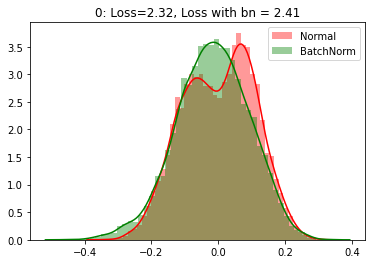

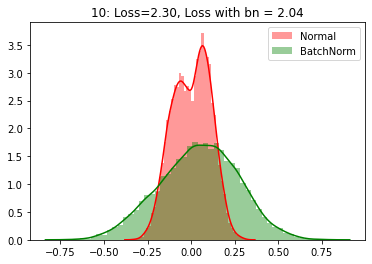

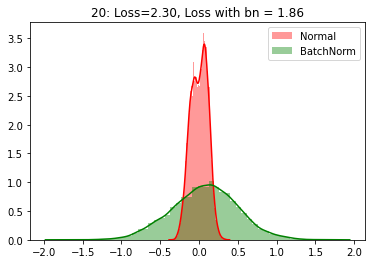

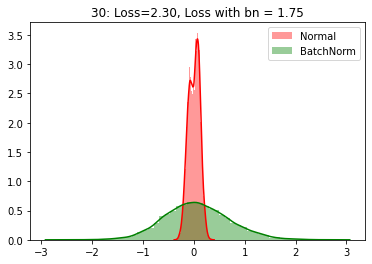

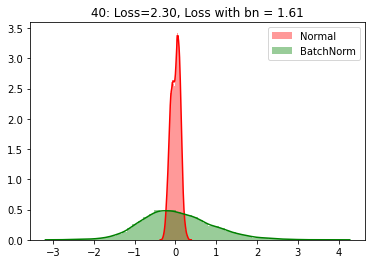

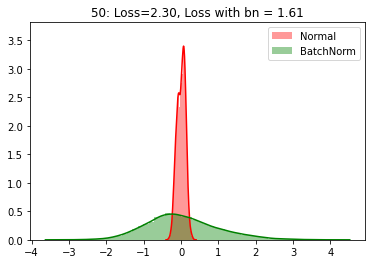

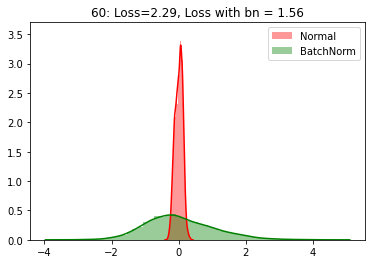

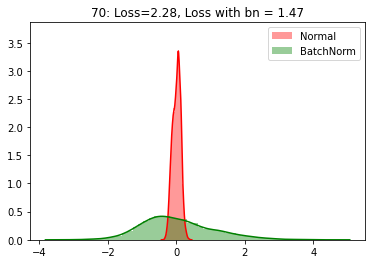

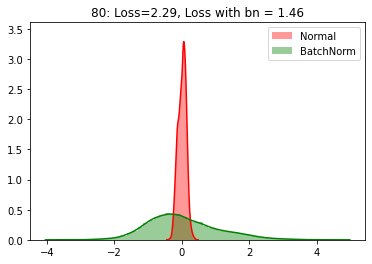

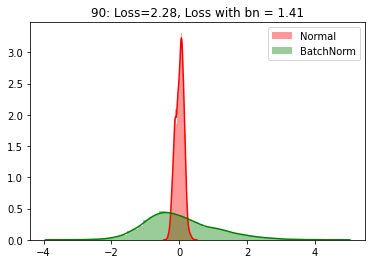

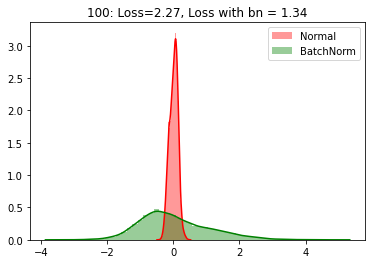

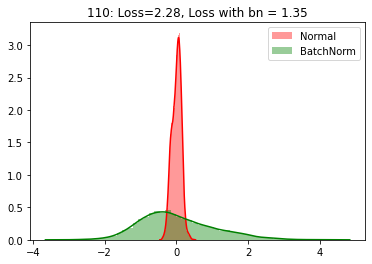

----------------


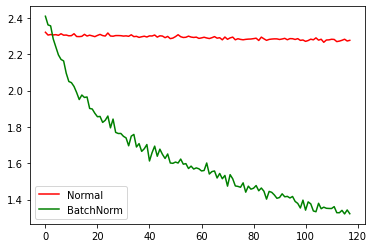

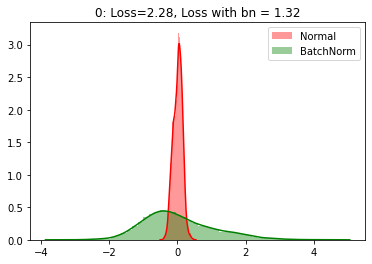

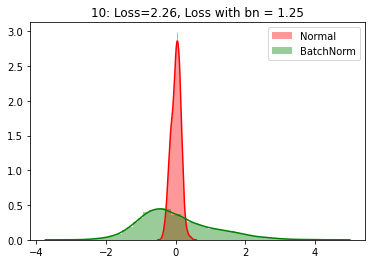

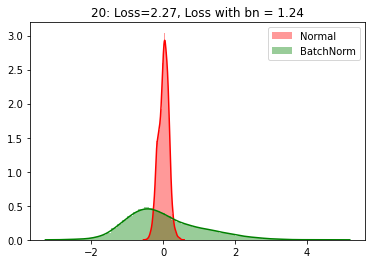

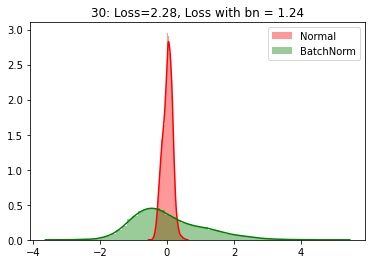

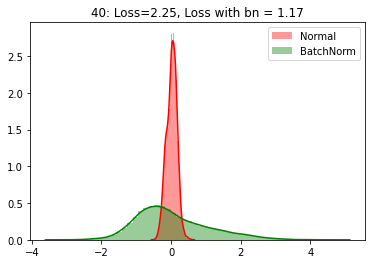

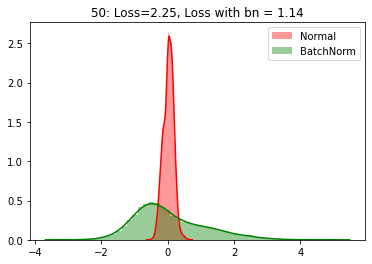

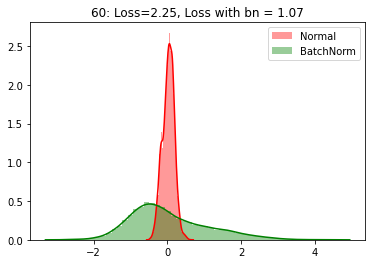

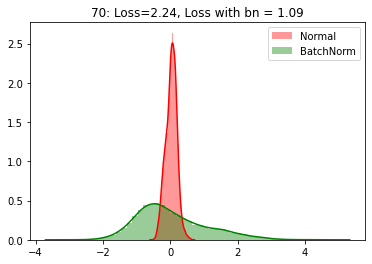

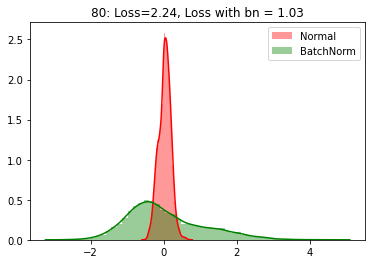

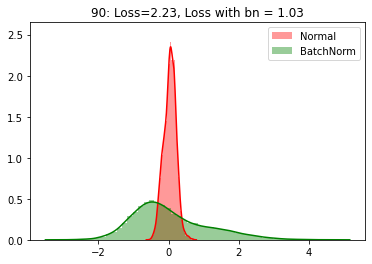

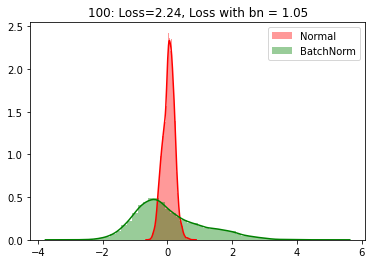

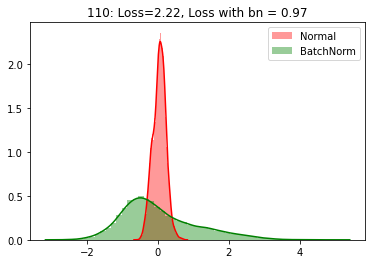

----------------


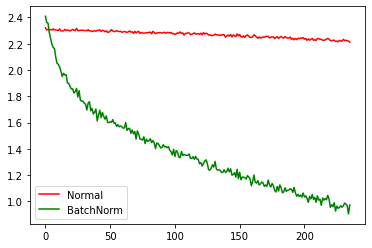

In [82]:
loss_arr = []
loss_bn_arr = []
max_epochs = 2

for epoch in range(max_epochs):
  for i, data in enumerate(trainloader, 0):

    inputs, labels = data

    opt.zero_grad()
    outputs = model(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()


    opt_bn.zero_grad()
    outputs_bn = model_bn(inputs)
    loss_bn = loss_fn(outputs_bn, labels)
    loss_bn.backward()
    opt_bn.step()

    loss_arr.append(loss.item())
    loss_bn_arr.append(loss_bn.item())

    if i%10 == 0:

      inputs = inputs.view(inputs.size(0), -1)

      model.eval()
      model_bn.eval()

      a = model.classifier[0](inputs)
      a = model.classifier[1](a)
      a = model.classifier[2](a)
      a = a.detach().numpy().ravel()
      sns.distplot(a, kde=True, color='r', label='Normal')

      b = model_bn.classifier[0](inputs)
      b = model_bn.classifier[1](b)
      b = model_bn.classifier[2](b)
      b = model_bn.classifier[3](b)
      b = model_bn.classifier[4](b)
      b = b.detach().numpy().ravel()

      sns.distplot(b, kde=True, color='g', label='BatchNorm' )

      plt.title('%d: Loss=%0.2f, Loss with bn = %0.2f'% (i, loss.item(), loss_bn.item()))
      plt.legend()
      plt.show()
      plt.pause(0.5)

      model.train()
      model_bn.train()

  print('----------------')

  plt.plot(loss_arr ,'r', label='Normal')
  plt.plot(loss_bn_arr ,'g', label='BatchNorm')

  plt.legend()
  plt.show()

#BatchNorm2d

In [0]:
class CNN_BN(nn.Module):
  def __init__(self):
    super(CNN_BN, self).__init__()
    self.features = nn.Sequential(
        nn.Conv2d(1,3,5),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),
        nn.Conv2d(3,6,3),
        nn.BatchNorm2d(6)
    )
    self.features1 = nn.Sequential(
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Linear(150,25),
        nn.ReLU(),
        nn.Linear(25, 10)
    )

  def forward(self,x):
    x = self.features(x)
    x = self.features1(x)
    x =x.view(x.size(0), -1)
    x= self.classifier(x)
    return x

In [84]:
model_bn2d = CNN_BN()
print(model_bn2d)

CNN_BN(
  (features): Sequential(
    (0): Conv2d(1, 3, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
    (4): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (features1): Sequential(
    (0): ReLU()
    (1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (classifier): Sequential(
    (0): Linear(in_features=150, out_features=25, bias=True)
    (1): ReLU()
    (2): Linear(in_features=25, out_features=10, bias=True)
  )
)


In [0]:
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(model.parameters(), lr=0.01)
opt_bn2d = optim.SGD(model_bn2d.parameters(), lr=0.01)